In [50]:
## see ResourceAssembly_func for details
%run ResourceAssembly_func.ipynb

cvxpy not installed. Community.SteadyState() not available.


In [113]:
## The main data file exceeded 25MB limit of Github uploads.
## It was splitted and uploaded. Here we merge it.

survs1 = load_obj('221128_survs_d02_1');
survs2 = load_obj('221128_survs_d02_2');
surv = survs1.copy();
for key in survs2.keys():
    surv[key] = survs2[key];
save_obj(survs, '221128_survs_d02_merged');

# Fig. 1

## Fig. 1b

In [7]:
## set up parameters and run competitions
# set parameters
d=0.1;
a11=1;  a12=1; a21=1;  a22=1; a31=1;  a32=1;
r11=0.4; r12=0.2; r21=0.21;  r22=0.1; r31=0.1;  r32=0.5; c10 = 0.65; c20=0.85; # for main text fig
# format parameters
R12 = np.array([[ r11,r12 ],[r21,r22]]); RA12 = np.array([[ r11*a11,r12*a12 ],[r21*a21,r22*a22]]);
R23 = np.array([[ r21,r22 ],[r31,r32]]); RA23 = np.array([[ r21*a21,r22*a22 ],[r31*a31,r32*a32]]);
R13 = np.array([[ r11,r12 ],[r31,r32]]); RA13 = np.array([[ r11*a11,r12*a12 ],[r31*a31,r32*a32]]);
R123 = np.array([[ r11,r12 ],[ r21,r22 ],[r31,r32]]); RA123 = np.array([[ r11*a11,r12*a12 ],[ r21*a21,r22*a22 ],[r31*a31,r32*a32]]);
# get ZNGIs
n1x = np.linspace(0,d/r11,10); n1y=np.linspace(d/r12,0,10);
n2x = np.linspace(0,d/r21,10); n2y=np.linspace(d/r22,0,10);
n3x = np.linspace(0,d/r31,10); n3y=np.linspace(d/r32,0,10);
x12 = d*(r22-r12)/(r11*r22-r12*r21); y12=d*(r11-r21)/(r11*r22-r12*r21);
c1x_12= np.linspace(x12,x12+20*a11*r11*np.abs(r22-r12),10); c1y_12= np.linspace(y12,y12+20*a12*r12*np.abs(r11-r21),10);
c2x_12= np.linspace(x12,x12+20*a21*r21*np.abs(r22-r12),10); c2y_12= np.linspace(y12,y12+20*a22*r22*np.abs(r11-r21),10);
x23 = d*(r32-r22)/(r21*r32-r22*r31); y23=d*(r21-r31)/(r21*r32-r22*r31);
c1x_23= np.linspace(x23,x23+20*a21*r21*np.abs(r32-r22),10); c1y_23= np.linspace(y23,y23+20*a22*r22*np.abs(r21-r31),10);
c2x_23= np.linspace(x23,x23+20*a31*r31*np.abs(r32-r22),10); c2y_23= np.linspace(y23,y23+20*a32*r32*np.abs(r21-r31),10);
x13 = d*(r32-r12)/(r11*r32-r12*r31); y13=d*(r11-r31)/(r11*r32-r12*r31);
c1x_13= np.linspace(x13,x13+20*a11*r11*np.abs(r32-r12),10); c1y_13= np.linspace(y13,y13+20*a12*r12*np.abs(r11-r31),10);
c2x_13= np.linspace(x13,x13+20*a31*r31*np.abs(r32-r12),10); c2y_13= np.linspace(y13,y13+20*a32*r32*np.abs(r11-r31),10);
# run competition and solve for trajectory
traj1,c1=trajc12( 0.1,0.1,  c10,c20,d,R12,RA12 )
traj2,c2=trajc12( 0.1,0.1,  c10,c20,d,R23,RA23 )
traj3,c3=trajc12( 0.1,0.1,  c10,c20,d,R13,RA13 )
traj4,c4=trajc123( 0.01,0.01,0.01, c10,c20,d,R123,RA123 )
print("1 vs 2:",c1)
print("2 vs 3:",c2)
print("1 vs 3:",c3)
print("trio:",c4)

1 vs 2: (0.9999999999971428, 2.8571589538728404e-12, 0)
2 vs 3: (1.366929861306591e-09, 0.9999999986330701, 0)
1 vs 3: (0.4952380892984053, 0.5047619107015947, 0)
trio: (0.495238094343615, 0, 0.5047619056563857)


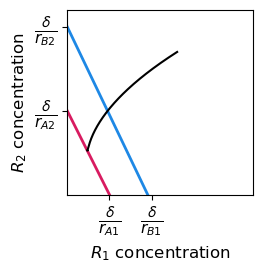

In [15]:
# plot A-B competition
fig, ax = plt.subplots( figsize=(2.4,2.4)  );
ax.plot(n1x,n1y,color='#D81B60', linewidth=2)
ax.plot(n2x,n2y,color='#1E88E5', linewidth=2)
ax.plot(c1x_12,c1y_12,color='#D81B60', linestyle='--', linewidth=2)
ax.plot(c2x_12,c2y_12,color='#1E88E5',linestyle='--', linewidth=2)
ax.plot(traj1[:,2],traj1[:,3], color='k'); ax.set_xticks([0.25,0.5]); ax.set_yticks([0.5,1]); ax.set_xticklabels([r'$\frac{\mathcal{\delta}}{r_{A1}}$',r'$\frac{\mathcal{\delta}}{r_{B1}}$'], fontsize=16); ax.set_yticklabels([r'$\frac{\mathcal{\delta}}{r_{A2}}$',r'$\frac{\mathcal{\delta}}{r_{B2}}$'], fontsize=16);
ax.set_xlim(0,1.1); ax.set_ylim(0,1.1);
ax.set_xlabel('$R_1$ concentration', fontsize=12);ax.set_ylabel('$R_2$ concentration', fontsize=12);

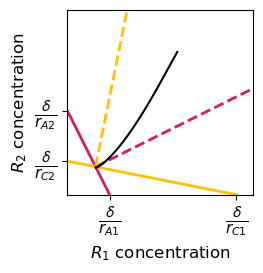

In [16]:
# plot A-C competition
fig, ax = plt.subplots( figsize=(2.4,2.4)  );
ax.plot(n1x,n1y,color='#D81B60', linewidth=2)
ax.plot(n3x,n3y,color='#FFC107', linewidth=2)
ax.plot(c1x_13,c1y_13,color='#D81B60',linestyle='--', linewidth=2)
ax.plot(c2x_13,c2y_13,'#FFC107',linestyle='--', linewidth=2)
ax.plot(traj3[:,2],traj3[:,3], color='k');ax.set_xticks([0.25,1]); ax.set_yticks([0.5,0.2]); ax.set_xticklabels([r'$\frac{\mathcal{\delta}}{r_{A1}}$',r'$\frac{\mathcal{\delta}}{r_{C1}}$'], fontsize=16); ax.set_yticklabels([r'$\frac{\mathcal{\delta}}{r_{A2}}$',r'$\frac{\mathcal{\delta}}{r_{C2}}$'], fontsize=16);
ax.set_xlim(0,1.1); ax.set_ylim(0,1.1);
ax.set_xlabel('$R_1$ concentration', fontsize=12);ax.set_ylabel('$R_2$ concentration', fontsize=12);

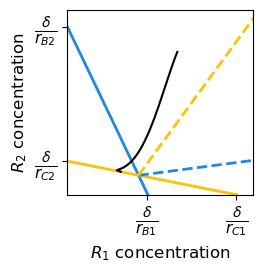

In [17]:
# plot B-C competition
fig, ax = plt.subplots( figsize=(2.4,2.4)  );
ax.plot(n2x,n2y,color='#1E88E5', linewidth=2)
ax.plot(n3x,n3y,color='#FFC107', linewidth=2)
ax.plot(c1x_23,c1y_23,color='#1E88E5',linestyle='--', linewidth=2)
ax.plot(c2x_23,c2y_23,'#FFC107',linestyle='--', linewidth=2)
ax.plot(traj2[:,2],traj2[:,3], color='k');ax.set_xticks([0.47,1]); ax.set_yticks([1,0.2]); ax.set_xticklabels([r'$\frac{\mathcal{\delta}}{r_{B1}}$',r'$\frac{\mathcal{\delta}}{r_{C1}}$'], fontsize=16); ax.set_yticklabels([r'$\frac{\mathcal{\delta}}{r_{B2}}$',r'$\frac{\mathcal{\delta}}{r_{C2}}$'], fontsize=16);
ax.set_xlim(0,1.1); ax.set_ylim(0,1.1);
ax.set_xlabel('$R_1$ concentration', fontsize=12);ax.set_ylabel('$R_2$ concentration', fontsize=12);

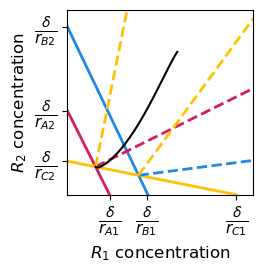

In [14]:
# plot A-B-C competition
fig, ax = plt.subplots( figsize=(2.4,2.4)  );
ax.plot(n1x,n1y,color='#D81B60', linewidth=2)
ax.plot(n2x,n2y,color='#1E88E5', linewidth=2)
ax.plot(n3x,n3y,color='#FFC107', linewidth=2)
ax.plot(c1x_12,c1y_12,color='#D81B60', linestyle='--', linewidth=2)
ax.plot(c2x_12,c2y_12,color='#1E88E5',linestyle='--', linewidth=2)
ax.plot(c1x_13,c1y_13,color='#D81B60',linestyle='--', linewidth=2)
ax.plot(c2x_13,c2y_13,'#FFC107',linestyle='--', linewidth=2)
ax.plot(c1x_23,c1y_23,color='#1E88E5',linestyle='--', linewidth=2)
ax.plot(c2x_23,c2y_23,'#FFC107',linestyle='--', linewidth=2)
ax.plot(traj4[:,3],traj4[:,4], color='k');ax.set_xticks([0.25,0.47,1]); ax.set_yticks([0.5,1,0.2]); ax.set_xticklabels([r'$\frac{\mathcal{\delta}}{r_{A1}}$',r'$\frac{\mathcal{\delta}}{r_{B1}}$',r'$\frac{\mathcal{\delta}}{r_{C1}}$'], fontsize=16); ax.set_yticklabels([r'$\frac{\mathcal{\delta}}{r_{A2}}$',r'$\frac{\mathcal{\delta}}{r_{B2}}$',r'$\frac{\mathcal{\delta}}{r_{C2}}$'], fontsize=16);
ax.set_xlim(0,1.1); ax.set_ylim(0,1.1);
ax.set_xlabel('$R_1$ concentration', fontsize=12);ax.set_ylabel('$R_2$ concentration', fontsize=12);

# Fig. 2

## Fig. 2a

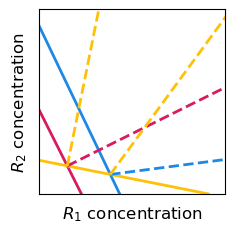

In [20]:
# plot A-B-C competition of Fig. 1b without trajectory
fig, ax = plt.subplots( figsize=(2.4,2.4)  );
ax.plot(n1x,n1y,color='#D81B60', linewidth=2)
ax.plot(n2x,n2y,color='#1E88E5', linewidth=2)
ax.plot(n3x,n3y,color='#FFC107', linewidth=2)
ax.plot(c1x_12,c1y_12,color='#D81B60', linestyle='--', linewidth=2)
ax.plot(c2x_12,c2y_12,color='#1E88E5',linestyle='--', linewidth=2)
ax.plot(c1x_13,c1y_13,color='#D81B60',linestyle='--', linewidth=2)
ax.plot(c2x_13,c2y_13,'#FFC107',linestyle='--', linewidth=2)
ax.plot(c1x_23,c1y_23,color='#1E88E5',linestyle='--', linewidth=2)
ax.plot(c2x_23,c2y_23,'#FFC107',linestyle='--', linewidth=2)
ax.set_xlim(0,1.1); ax.set_ylim(0,1.1);
ax.set_xticks([]); ax.set_yticks([]);
ax.set_xlabel('$R_1$ concentration', fontsize=12);ax.set_ylabel('$R_2$ concentration', fontsize=12);

## Fig. 2b

In [29]:
# set parameters for the case with violations
r31=0.1; r32=0.8; r11=0.8;  r12=0.1; r21=0.2;  r22=0.2; 
a31=1;  a32=3; a11=1.2;  a12=1; a21=7;  a22=1; c10 = 0.6; c20=0.95; # for violation

R12 = np.array([[ r11,r12 ],[r21,r22]]); RA12 = np.array([[ r11*a11,r12*a12 ],[r21*a21,r22*a22]]);
R23 = np.array([[ r21,r22 ],[r31,r32]]); RA23 = np.array([[ r21*a21,r22*a22 ],[r31*a31,r32*a32]]);
R13 = np.array([[ r11,r12 ],[r31,r32]]); RA13 = np.array([[ r11*a11,r12*a12 ],[r31*a31,r32*a32]]);
R123 = np.array([[ r11,r12 ],[ r21,r22 ],[r31,r32]]); RA123 = np.array([[ r11*a11,r12*a12 ],[ r21*a21,r22*a22 ],[r31*a31,r32*a32]]);
n1x = np.linspace(0,d/r11,10); n1y=np.linspace(d/r12,0,10);
n2x = np.linspace(0,d/r21,10); n2y=np.linspace(d/r22,0,10);
n3x = np.linspace(0,d/r31,10); n3y=np.linspace(d/r32,0,10);
x12 = d*(r22-r12)/(r11*r22-r12*r21); y12=d*(r11-r21)/(r11*r22-r12*r21);
c1x_12= np.linspace(x12,x12+20*a11*r11*np.abs(r22-r12),10); c1y_12= np.linspace(y12,y12+20*a12*r12*np.abs(r11-r21),10);
c2x_12= np.linspace(x12,x12+20*a21*r21*np.abs(r22-r12),10); c2y_12= np.linspace(y12,y12+20*a22*r22*np.abs(r11-r21),10);
x23 = d*(r32-r22)/(r21*r32-r22*r31); y23=d*(r21-r31)/(r21*r32-r22*r31);
c1x_23= np.linspace(x23,x23+20*a21*r21*np.abs(r32-r22),10); c1y_23= np.linspace(y23,y23+20*a22*r22*np.abs(r21-r31),10);
c2x_23= np.linspace(x23,x23+20*a31*r31*np.abs(r32-r22),10); c2y_23= np.linspace(y23,y23+20*a32*r32*np.abs(r21-r31),10);
x13 = d*(r32-r12)/(r11*r32-r12*r31); y13=d*(r11-r31)/(r11*r32-r12*r31);
c1x_13= np.linspace(x13,x13+20*a11*r11*np.abs(r32-r12),10); c1y_13= np.linspace(y13,y13+20*a12*r12*np.abs(r11-r31),10);
c2x_13= np.linspace(x13,x13+20*a31*r31*np.abs(r32-r12),10); c2y_13= np.linspace(y13,y13+20*a32*r32*np.abs(r11-r31),10);

Text(0, 0.5, '$R_2$ concentration')

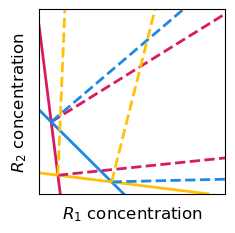

In [31]:
# plot the phase diagram
fig, ax = plt.subplots( figsize=(2.4,2.4)  );
ax.plot(n1x,n1y,color='#D81B60', linewidth=2)
ax.plot(n2x,n2y,color='#1E88E5', linewidth=2)
ax.plot(n3x,n3y,color='#FFC107', linewidth=2)
ax.plot(c1x_12,c1y_12,color='#D81B60', linestyle='--', linewidth=2)
ax.plot(c2x_12,c2y_12,color='#1E88E5',linestyle='--', linewidth=2)
ax.plot(c1x_13,c1y_13,color='#D81B60',linestyle='--', linewidth=2)
ax.plot(c2x_13,c2y_13,'#FFC107',linestyle='--', linewidth=2)
ax.plot(c1x_23,c1y_23,color='#1E88E5',linestyle='--', linewidth=2)
ax.plot(c2x_23,c2y_23,'#FFC107',linestyle='--', linewidth=2)
ax.set_xticks([]); ax.set_yticks([]);
ax.set_xlim(0,1.1); ax.set_ylim(0,1.1);
ax.set_xlabel('$R_1$ concentration', fontsize=12);ax.set_ylabel('$R_2$ concentration', fontsize=12)

# Fig. 4

## Fig. 4b

In [3]:
### Load data from simulated resource competitions
## (see _run and _function codes for more details)
survs = load_obj('221128_survs_d02_merged');
growths = load_obj('221128_growths_d02_merged');
## specify competition conditions to analyze, in terms of the number of species and resources 
Ss = [3]; Rs = [1, 3, 5, 10,20,30,50,75,100]; 
## 3 proxy for 3 predictions
### gpreds: prediction accuracy for 'fastest species excludes all others
### arules: the assembly rule prediction accuracy
### nsurvs: number of survivors in each trio competition
nsurvs={};
arules={};
gpreds={};
## threshold for survival is set as 1e-4 (0.01%)
thress=np.ones(len(Rs))*1e-4;
## calculate prediction accuracy for each competition
for i in np.arange(len(Ss)):
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j]; thres=thress[j];
        surv = survs[(S,R)]; growth=growths[(S,R)];
        ## filter out competitions in which neither species in pair survivced
        filt = filter_surv(surv, thres);
        surv = surv[filt]; growth=growth[filt];
        nsurvs[(S,R)]=[];
        arules[(S,R)]=[];
        gpreds[(S,R)]=[];
        nsurv = np.sum(surv[:,-1,:]>thres, axis=1);
        nsurvs[(S,R)] += list(nsurv);
        arules[(S,R)] += list(arule_m(surv, thres=thres));
        gpreds[(S,R)] += list(pred_growth(surv, growth, thres=thres) );

In [4]:
## calculate statistics for each competition condition
arule_aves = np.zeros((len(Ss),len(Rs)));
nsurv_aves = np.zeros((len(Ss),len(Rs)));
gpreds_aves = np.zeros((len(Ss),len(Rs)));
arule_stds = np.zeros((len(Ss),len(Rs)));
nsurv_stds = np.zeros((len(Ss),len(Rs)));
npair_stds = np.zeros((len(Ss),len(Rs)));
gpreds_stds = np.zeros((len(Ss),len(Rs)));
lens = np.zeros((len(Ss),len(Rs)));
for i in np.arange(len(Ss)):
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j];
        key = (S,R);
        arule_aves[i,j] = np.average(arules[key]);
        nsurv_aves[i,j] = np.average(nsurvs[key]);
        gpreds_aves[i,j] = np.average(gpreds[key]);
        arule_stds[i,j] = np.std(np.array(arules[key]));
        nsurv_stds[i,j] = np.std(np.array(nsurvs[key]));
        gpreds_stds[i,j] = np.std(np.array(gpreds[key]));
        lens[i,j] = len( arules[key] )

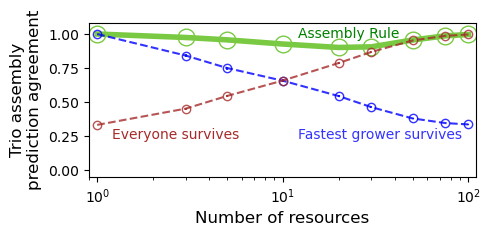

In [6]:
## plot prediction accuracies
fig, ax = plt.subplots(figsize=(5,2));
ax.errorbar(Rs, arule_aves[0], yerr=arule_stds[0]/(500**0.5), marker='o', mfc='None', color='#7AC943', markersize=12, linewidth=4);
ax.errorbar(Rs, gpreds_aves[0], yerr=gpreds_stds[0]/(500**0.5), marker='o', mfc='None', markersize=6, color='blue', linestyle='--', alpha=0.8);
ax.errorbar(Rs, nsurv_aves[0]/3, yerr=nsurv_stds[0]/(500**0.5)/3, marker='o', mfc='None', color='brown', markersize=6, linestyle='--', alpha=0.8);
ax.set_ylim(-0.05, 1.08);
ax.set_xticks([1,3,5,10,20,30,50,75,100]);
ax.set_xscale('log');
ax.set_xlim(0.9,110);
ax.text(12.,0.97,'Assembly Rule', color='green' );
ax.text(12,0.23,'Fastest grower survives', color='blue', alpha=0.8);
ax.text(1.2,0.23,'Everyone survives', color='brown' );
ax.set_xlabel('Number of resources', fontsize=12);
ax.set_ylabel('Trio assembly\nprediction agreement', fontsize=12);

## Fig. 4c

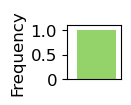

In [12]:
## classify trio competition outcomes for single resource
i=1;
surv = survs[(3,i)][filter_surv( survs[(3,i)] )];
outcome, viol = arule(surv, thres=thress[0]);
fig, ax = plot_outcome(outcome)
ax.set_yticks([0,250,500]);
ax.set_yticklabels(['','',''], fontsize=12);
ax.set_ylim(0,550);
fig.set_size_inches(0.7, 0.7); ax.set_xlim(-0.6,0.5); ax.set_yticklabels([0,0.5,1.0], fontsize=12); ax.set_ylabel('Frequency', fontsize=12);

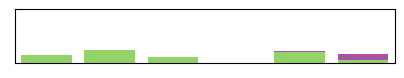

In [13]:
## classify trio competition outcomes for 5 resources
i=5;
surv = survs[(3,i)][filter_surv( survs[(3,i)] )];
outcome, viol = arule(surv, thres=thress[0]);
fig, ax = plot_outcome(outcome);
ax.set_yticks([0,250,500]);
ax.set_yticklabels(['','',''], fontsize=12);
ax.set_ylim(0,550);
fig.set_size_inches(4.9, 0.7); ax.set_yticks([]); ax.set_ylabel('');

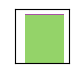

In [14]:
## classify trio competition outcomes for 100 resources
i=100;
surv = survs[(3,i)][filter_surv( survs[(3,i)] )];
outcome, viol = arule(surv, thres=thress[0]);
fig, ax = plot_outcome(outcome);
ax.set_yticks([0,250,500]);
ax.set_yticklabels(['','',''], fontsize=12);
ax.set_ylim(0,550);
fig.set_size_inches(0.7, 0.7); ax.set_xlim(4.4,5.5); ax.set_yticks([0,50,100]); ax.set_ylim(0,110); ax.set_yticks([]); ax.set_ylabel('');

## Fig. 4f

In [16]:
## specify data from simulated resource competitions
Ss = [3,5,7,10,12]; Rs = [1, 3, 5, 10,20,30,50,75,100]; 
survs = load_obj('221128_survs_d02_merged');
## assembly rule prediction accuracy
accu = np.zeros((len(Ss),len(Rs)));
## calculate prediction accuracy ofr each condition
for i in np.arange(len(Ss)):
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j]; thres=1e-4;
        surv = survs[(S,R)]; 
        filt = filter_surv(surv, thres); ## filters out cases where neither species in pair survive
        surv = surv[filt]; 
        surv = surv*(surv>thres)+thres*0.1; #add small number to avoid NaN in harmonic rule prediction
        pred = arule_h(surv, repeat=True, method=0, thres=thres); # harmonic rule prediction
        accu[i,j] = 1-np.mean( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S; # assembly rule accuracy

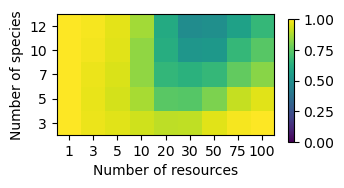

In [18]:
## heatmap of prediction accuracy
fig, ax = plt.subplots(figsize= (3.5,2))
panel = ax.imshow(accu,vmin=0, vmax=1)
ax.set_xticks(np.arange(len(Rs))); ax.set_xticklabels(Rs);
ax.set_yticks(np.arange(len(Ss))); ax.set_yticklabels(Ss);
ax.set_ylim(-0.5, len(Ss)-0.5);
ax.set_xlabel('Number of resources');
ax.set_ylabel('Number of species');
fig.colorbar(panel, ax=ax, anchor=(0, 0.3), shrink=0.8)

# Fig. 5

## Fig. 5a

In [19]:
## specify data from experiment
data_trio = pd.read_csv('expm_d_trio.csv')
data_pair = pd.read_csv('expm_d_pair.csv')

In [20]:
ss = ['Ea','Pa','Pci','Pp','Pv'];
drs = [10,100,1000,10000,100000,1000000]; # 'dilution rates' in experiment
trios = [(0,1,2),(0,2,4),(0,3,2),(3,2,1),(3,2,4)]; #trio species in competition e.g. (0,1,2) = ('Ea','Pa','Pci')
survs_d = np.zeros((5,6,4,3)); ## surviving fractions in pairwise and trio competitions
survs_d_f = np.zeros((30,4,3)); ## flattened surv_d
## load data from experiment, filtering out NaNs (unavailable experimental data)
for i in np.arange(5):
    for j in np.arange(6):
        trio = trios[i];
        data_p = data_trio[ (data_trio['DilutionRate']==drs[j]) & (data_trio['SpeciesA']==ss[trio[0]]) & (data_trio['SpeciesB']==ss[trio[1]]) & (data_trio['SpeciesC']==ss[trio[2]]) ];
        survs_d[i,j,3,0] = np.nanmean(data_p['Afraction']);
        survs_d[i,j,3,1] = np.nanmean(data_p['Bfraction']);
        survs_d[i,j,3,2] = np.nanmean(data_p['Cfraction']);
        
        data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) &  (data_pair['SpeciesA'] == ss[trio[0]]) & (data_pair['SpeciesB'] == ss[trio[1]])   ];
        survs_d[i,j,0,0] = np.nanmean(data_p['Afraction']);
        survs_d[i,j,0,1] = np.nanmean(data_p['Bfraction']);
        if(len(data_p)==0): 
            data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) &  (data_pair['SpeciesA'] == ss[trio[1]]) & (data_pair['SpeciesB'] == ss[trio[0]])   ];
            survs_d[i,j,0,1] = np.nanmean(data_p['Afraction']);
            survs_d[i,j,0,0] = np.nanmean(data_p['Bfraction']);
            
        data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) & (data_pair['SpeciesA']==ss[trio[2]]) & (data_pair['SpeciesB']==ss[trio[0]])];
        survs_d[i,j,1,2] = np.nanmean(data_p['Afraction']);
        survs_d[i,j,1,0] = np.nanmean(data_p['Bfraction']);
        if(len(data_p)==0): 
            data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) &  (data_pair['SpeciesA'] == ss[trio[0]]) & (data_pair['SpeciesB'] == ss[trio[2]])   ];
            survs_d[i,j,1,0] = np.nanmean(data_p['Afraction']);
            survs_d[i,j,1,2] = np.nanmean(data_p['Bfraction']);
            
        data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) & (data_pair['SpeciesA']==ss[trio[1]]) & (data_pair['SpeciesB']==ss[trio[2]])];
        survs_d[i,j,2,1] = np.nanmean(data_p['Afraction']);
        survs_d[i,j,2,2] = np.nanmean(data_p['Bfraction']);
        if(len(data_p)==0): 
            data_p = data_pair[ (data_pair['DilutionRate']==drs[j]) &  (data_pair['SpeciesA'] == ss[trio[2]]) & (data_pair['SpeciesB'] == ss[trio[1]])   ];
            survs_d[i,j,2,2] = np.nanmean(data_p['Afraction']);
            survs_d[i,j,2,1] = np.nanmean(data_p['Bfraction']);
            
        survs_d_f[i*6+j] = survs_d[i,j];

/var/folders/7b/nq028mzj0t5d__m3gh6ltp4w0000gn/T/ipykernel_10079/1366202118.py:24: RuntimeWarning: Mean of empty slice
  survs_d[i,j,1,2] = np.nanmean(data_p['Afraction']);
/var/folders/7b/nq028mzj0t5d__m3gh6ltp4w0000gn/T/ipykernel_10079/1366202118.py:25: RuntimeWarning: Mean of empty slice
  survs_d[i,j,1,0] = np.nanmean(data_p['Bfraction']);
/var/folders/7b/nq028mzj0t5d__m3gh6ltp4w0000gn/T/ipykernel_10079/1366202118.py:32: RuntimeWarning: Mean of empty slice
  survs_d[i,j,2,1] = np.nanmean(data_p['Afraction']);
/var/folders/7b/nq028mzj0t5d__m3gh6ltp4w0000gn/T/ipykernel_10079/1366202118.py:33: RuntimeWarning: Mean of empty slice
  survs_d[i,j,2,2] = np.nanmean(data_p['Bfraction']);


0.15151284364069836 0.10123038830341705 30 0.01848205572626288
0.07768708709191409 0.07094101493887105 90 0.007477839557695439


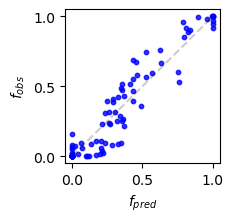

In [34]:
fig, ax = plt.subplots(figsize=(2.,2.));
surv = survs_d_f; thres=1e-4
filt = filter_surv(surv, thres);
surv = surv[filt];
surv = surv+thres*1e-10; # add small number to avoid NaNs
pred = arule_h(surv, repeat=True, method=1, thres=thres) # harmonic rule prediction
# individual species based error
stat = np.sum( (pred-surv[:,-1])**2, axis=1)**0.5;
print(np.mean( stat ), np.std(stat), len(stat), np.std(stat)/(len(stat)**0.5) );
# community based error
stat = ( (pred-surv[:,-1]) ); stat=stat.reshape(-1); stat=np.abs(stat);
print(np.mean( stat ), np.std(stat), len(stat), np.std(stat)/(len(stat)**0.5) );
# plot predicted fraction vs observed fraction
ax.scatter(pred,surv[:,-1], alpha=0.8, color='b', s=10);
ax.set_xlabel(r'$f_{pred}$'); ax.set_ylabel(r'$f_{obs}$');
ax.plot(np.linspace(0,1,10),np.linspace(0,1,10),'k--', alpha=0.2);
ax.set_yticks([0,0.5,1]); ax.set_yticklabels([0.0,0.5,1.0]);

## Fig. 5b

In [90]:
## Harmonic mean predictions for simulated communities
Ss = [3,5,7,10,12]; Rs = [1, 3, 5, 10,20,30,50,75,100]; 
survs = load_obj('221128_survs_d02_merged');
accu_q = np.zeros((len(Ss),len(Rs)));
accu_q_std = np.zeros((len(Ss),len(Rs)));

for i in np.arange(len(Ss)):
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j]; thres=1e-4;
        surv = survs[(S,R)]; 
        filt = filter_surv(surv, thres); ## filters out extinctions
        surv = surv[filt]; 
        surv = surv*(surv>thres)+thres*1e-3;

        pred = arule_h(surv, repeat=True, method=1, thres=thres);
        accu_q[i,j] = np.mean( np.sum( (pred-surv[:,-1])**2, axis=1)**0.5 ); # L2 norm
        accu_q_std[i,j] = np.std( np.sum( (pred-surv[:,-1])**2, axis=1)**0.5 ); # L2 norm std            

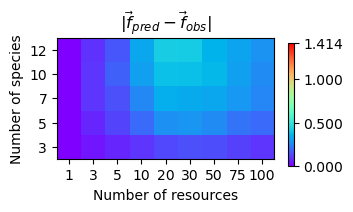

In [91]:
fig, ax = plt.subplots(figsize= (3.5,2));
panel = ax.imshow(accu_q,vmin=0, vmax=2**0.5, cmap=plt.cm.rainbow);
ax.set_xticks(np.arange(len(Rs))); ax.set_xticklabels(Rs);
ax.set_yticks(np.arange(len(Ss))); ax.set_yticklabels(Ss);
ax.set_ylim(-0.5, len(Ss)-0.5);
ax.set_title(r'$|\vec{f}_{pred}-\vec{f}_{obs}|$');
ax.set_xlabel('Number of resources');
ax.set_ylabel('Number of species');
fig.colorbar(panel, ax=ax, anchor=(0, 0.3), ticks=[0.0,0.5,1,2**0.5], shrink=0.8);

# Fig. 6

## Fig. 6c

In [43]:
## data for cross-feeding. 
## see Fig. 4b for detailed explanation
survs = load_obj('220406_survs_cf_3sp_dumi')
growths = load_obj('220406_growths_cf_3sp_dumi')
S=3;
ps = [0.5];
ls = [0., 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5];
nsurvs={};
arules={};
thress=np.ones(len(ls))*1e-4;
for i in np.arange(len(ps)):
    for j in np.arange(len(ls)):
        p = ps[i]; l = ls[j]; thres=thress[j];
        surv = survs[(S,p,l)]; growth=growths[(S,p,l)];
        filt = filter_surv(surv, thres);
        surv = surv[filt]; growth=growth[filt];
        nsurvs[(S,p,l)]=[];
        arules[(S,p,l)]=[];
        nsurv = np.sum(surv[:,-1,:]>thres, axis=1);
        nsurvs[(S,p,l)] += list(nsurv);
        arules[(S,p,l)] += list(arule_m(surv, thres=thres));

In [48]:
# calculate statistics
arule_aves = np.zeros((len(ls),len(ps)));
nsurv_aves = np.zeros((len(ls),len(ps)));
arule_stds = np.zeros((len(ls),len(ps)));
nsurv_stds = np.zeros((len(ls),len(ps)));
lens = np.zeros((len(ls),len(ps)));
for i in np.arange(len(ls)):
    for j in np.arange(len(ps)):
        l = ls[i]; p = ps[j];
        key = (S,p,l);
        arule_aves[i,j] = np.average(arules[key]);
        nsurv_aves[i,j] = np.average(nsurvs[key]);
        arule_stds[i,j] = np.std(np.array(arules[key]));
        nsurv_stds[i,j] = np.std(np.array(nsurvs[key]));
        lens[i,j] = len( arules[key] )

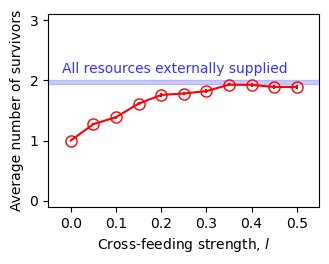

In [47]:
fig, ax = plt.subplots(figsize=(3.5,2.5))
ax.errorbar(np.array(ls), nsurv_aves[:,0], yerr=nsurv_stds[:,0]/(500**0.5), marker='o', mfc='None', markersize=8, color='red');
nocf = 1.976; nocferr = 0.6568287448033924; ## values from 3 species, 10 resources competition without any cross-feeding
ax.text(-0.02,nocf+0.15,'All resources externally supplied', color='blue', alpha=0.8);
ax.set_xlabel('Cross-feeding strength, $l$')
ax.set_ylabel('Average number of survivors')
ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5]);
ax.set_xlim(-0.05,0.55);
ax.set_ylim(-0.1,3.1);
rec = matplotlib.patches.Rectangle( (-1, nocf-nocferr/(500**0.5)), 2, 2*nocferr/(500**0.5), color='blue', alpha=0.2 );
ax.add_artist(rec);

## Fig. 6d

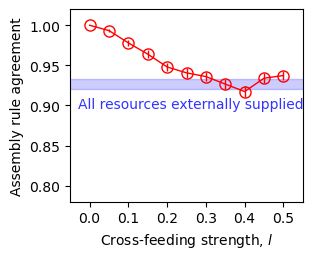

In [49]:
fig, ax = plt.subplots(figsize=(3.,2.5));
ax.errorbar(ls, arule_aves[:,0], yerr=arule_stds[:,0]/(500**0.5), marker='o', mfc='None', linewidth=1, markersize=8, color='r');
nocf = 0.9266666666666666; nocferr = 0.13808210118138647; ## values from 3 species, 10 resources competition without any cross-feeding
ax.set_ylim(0.78, 1.02)
ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5]);
ax.set_xlim(-0.05,0.55)
ax.set_yticks([0.8, 0.85, 0.9,0.95,1])
ax.set_xlabel('Cross-feeding strength, $l$')
ax.set_ylabel('Assembly rule agreement')
rec = matplotlib.patches.Rectangle( (-1, nocf-nocferr/(500**0.5)), 2, 2*nocferr/(500**0.5), color='blue', alpha=0.2 );
ax.add_artist(rec)
ax.text(-0.03,nocf-0.03,'All resources externally supplied', color='b', alpha=0.8);

# SI figs

## Appendix I

### Fig. S6 (alternative models)

In [97]:
Ss = [3, 5, 7, 10];
Rs = [1, 3, 5, 10];
fnames = ['221128_survs_d02_merged','221001_survs_d02_Monod_K(1,0.2)_merged','221001_survs_d02_LLM_K(1,0.2)'];
accu = np.zeros((len(fnames),len(Ss),len(Rs)));

for k in np.arange(len(fnames)):
    survs = load_obj(fnames[k]);
    for i in np.arange(len(Ss)):
        for j in np.arange(len(Rs)):
            S = Ss[i]; R = Rs[j]; thres=1e-4;
            surv = survs[(S,R)]; #growth=growths[(S,R)];
            filt = filter_surv(surv, thres); ## filters out extinctions
            surv = surv[filt]; #growth=growth[filt];
            surv = surv*(surv>thres)+thres*0.1;

            pred = arule_h(surv, repeat=True, method=1, thres=thres);
            accu[k,i,j] = 1-np.average( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;            

(-0.05, 1.05)

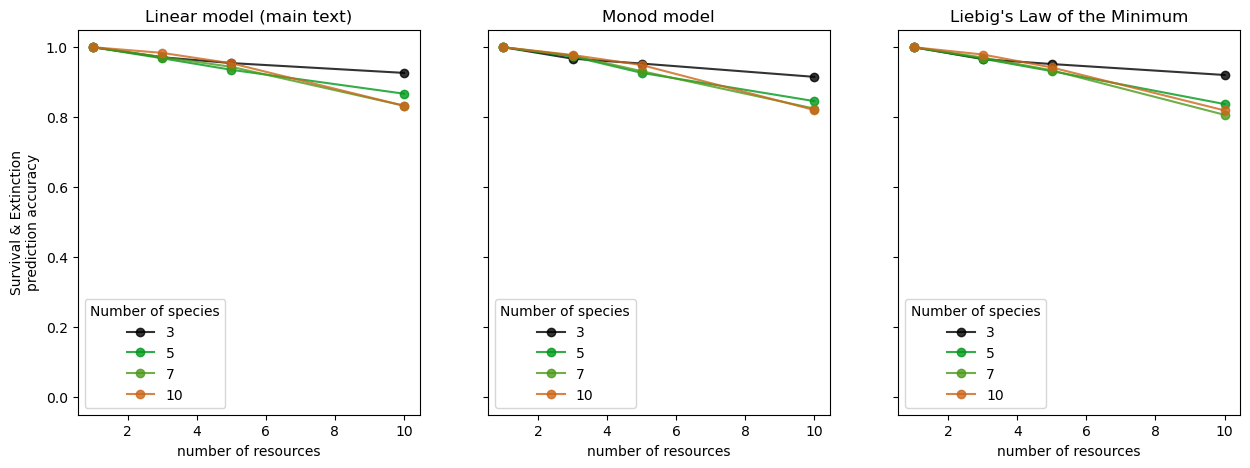

In [98]:
fig, ax = plt.subplots( 1, len(fnames), figsize=(5*len(fnames),5), sharey=True);
data = accu;
ax[0].set_ylabel('Survival & Extinction\nprediction accuracy')
xmax = len(Ss);
for k in np.arange(len(fnames)):
    ax[k].set_xlabel('number of resources');
titles = ['Linear model (main text)', 'Monod model', 'Liebig\'s Law of the Minimum']
for k in np.arange(len(fnames)):
    ax[k].set_title(titles[k])

for k in np.arange(len(fnames)):
    for i in np.arange(xmax):
        ax[k].plot(Rs, data[k,i], color=colors[i], marker='o', alpha=0.8);
        ax[k].legend(Ss, title='Number of species');
ax[k].set_ylim(-0.05,1.05)

### Fig. S7 (tradeoffs)

In [99]:
Ss = [3,5,7,10]; Rs = [1, 3, 5, 10];fnames = ['221128_survs_d02_merged','221004_survs_d02','221005_survs_d02'] 
accu = np.zeros((len(fnames),len(Ss),len(Rs)));

for k in np.arange(len(fnames)):
    survs = load_obj(fnames[k]);
    for i in np.arange(len(Ss)):
        for j in np.arange(len(Rs)):
            S = Ss[i]; R = Rs[j]; thres=1e-4;
            surv = survs[(S,R)]; #growth=growths[(S,R)];
            filt = filter_surv(surv, thres); ## filters out extinctions
            surv = surv[filt]; #growth=growth[filt];
            surv = surv*(surv>thres)+thres*0.1;

            pred = arule_h(surv, repeat=True, method=1, thres=thres);
            accu[k,i,j] = 1-np.average( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;            

(-0.05, 1.05)

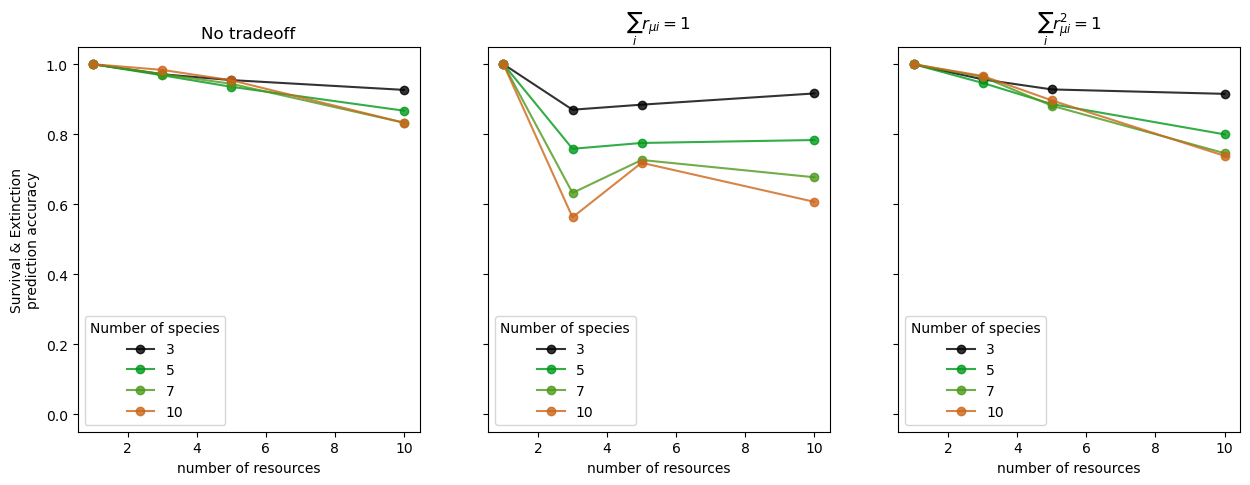

In [100]:
fig, ax = plt.subplots( 1, len(fnames), figsize=(5*len(fnames),5), sharey=True);
data = accu;
ax[0].set_ylabel('Survival & Extinction\nprediction accuracy')
xmax = len(Ss);
for k in np.arange(len(fnames)):
    ax[k].set_xlabel('number of resources');
titles = ['No tradeoff', '$\sum_{i}r_{\mu i}=1$', '$\sum_{i}r_{\mu i}^2=1$']
for k in np.arange(len(fnames)):
    ax[k].set_title(titles[k])

for k in np.arange(len(fnames)):
    for i in np.arange(xmax):
        ax[k].plot(Rs, data[k,i], color=colors[i], marker='o', alpha=0.8);
        ax[k].legend(Ss, title='Number of species');
ax[k].set_ylim(-0.05,1.05)

### Fig. S8 (alternative parameters)

In [101]:
Ss=[3]; Rs=[1,3,5,10,20,50]; fnames = ['221128_survs_d02_merged','221217_survs_d02_p050','221217_survs_d02_p000'];
accu = np.zeros((len(fnames),len(Ss),len(Rs)));

for k in np.arange(len(fnames)):
    survs = load_obj(fnames[k]);
    for i in np.arange(len(Ss)):
        for j in np.arange(len(Rs)):
            S = Ss[i]; R = Rs[j]; thres=1e-4;
            surv = survs[(S,R)]; #growth=growths[(S,R)];
            filt = filter_surv(surv, thres); ## filters out extinctions
            surv = surv[filt]; #growth=growth[filt];
            surv = surv*(surv>thres)+thres*0.1;

            pred = arule_h(surv, repeat=True, method=1, thres=thres);
            accu[k,i,j] = 1-np.average( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;            

(-0.05, 1.05)

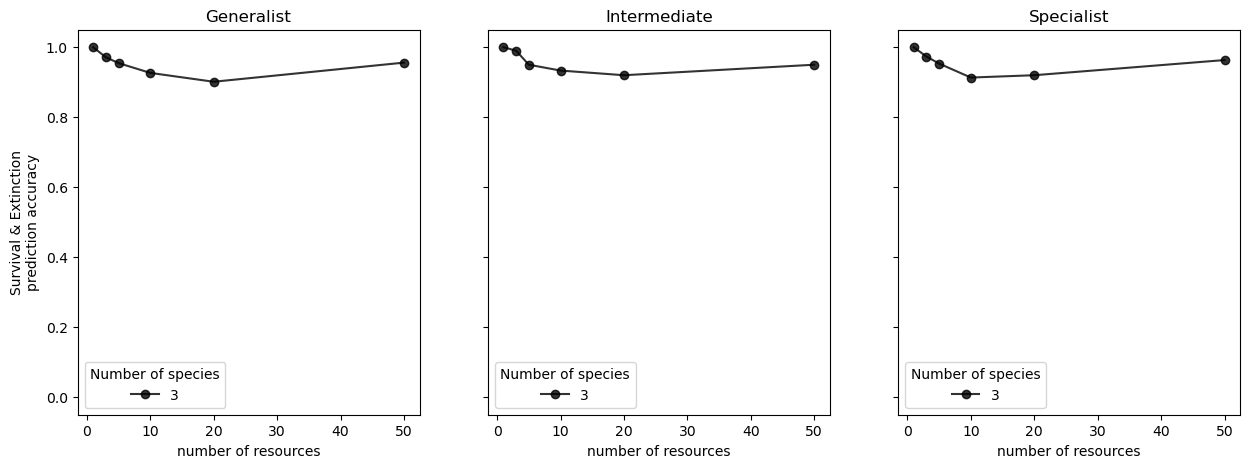

In [102]:
fig, ax = plt.subplots( 1, len(fnames), figsize=(5*len(fnames),5), sharey=True);
data = accu;
ax[0].set_ylabel('Survival & Extinction\nprediction accuracy')
xmax = len(Ss);
for k in np.arange(len(fnames)):
    ax[k].set_xlabel('number of resources');
titles = ['Generalist', 'Intermediate', 'Specialist']
for k in np.arange(len(fnames)):
    ax[k].set_title(titles[k])

for k in np.arange(len(fnames)):
    for i in np.arange(xmax):
        ax[k].plot(Rs, data[k,i], color=colors[i], marker='o', alpha=0.8);
        ax[k].legend(Ss, title='Number of species');
ax[k].set_ylim(-0.05,1.05)

In [103]:
Ss=[3]; Rs=[1,3,5,10,20,50]; fnames = ['221001_survs_d02_merged','221217_survs_d02_gaussian','221217_survs_d02_exponential'];
accu = np.zeros((len(fnames),len(Ss),len(Rs)));

for k in np.arange(len(fnames)):
    survs = load_obj(fnames[k]);
    for i in np.arange(len(Ss)):
        for j in np.arange(len(Rs)):
            S = Ss[i]; R = Rs[j]; thres=1e-4;
            surv = survs[(S,R)]; 
            filt = filter_surv(surv, thres); ## filters out extinctions
            surv = surv[filt]; 
            surv = surv*(surv>thres)+thres*0.1;

            pred = arule_h(surv, repeat=True, method=1, thres=thres);
            accu[k,i,j] = 1-np.average( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;            

(-0.05, 1.05)

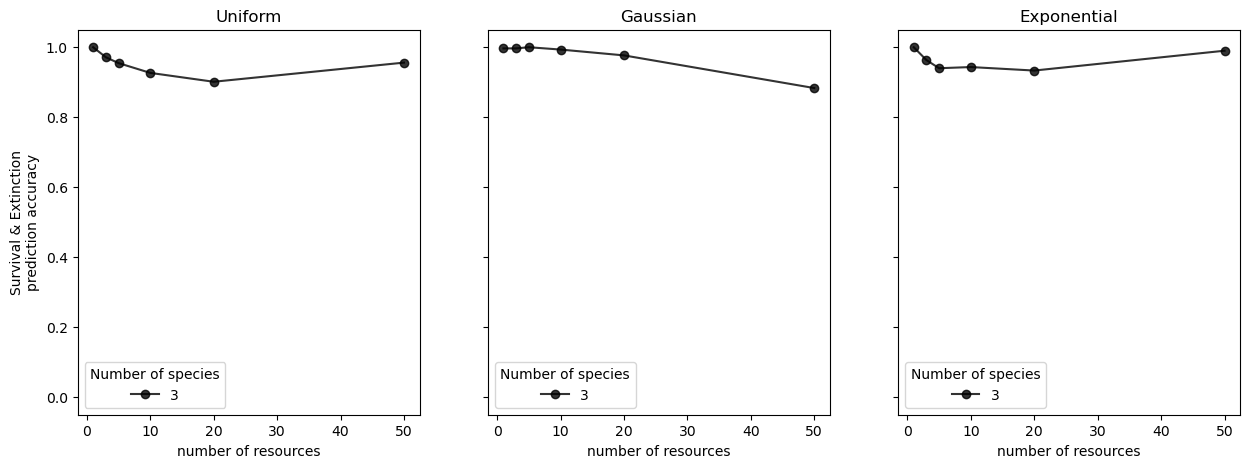

In [77]:
fig, ax = plt.subplots( 1, len(fnames), figsize=(5*len(fnames),5), sharey=True);
data = accu;
ax[0].set_ylabel('Survival & Extinction\nprediction accuracy')
xmax = len(Ss);
for k in np.arange(len(fnames)):
    ax[k].set_xlabel('number of resources');
titles = ['Uniform', 'Gaussian', 'Exponential']
for k in np.arange(len(fnames)):
    ax[k].set_title(titles[k])

for k in np.arange(len(fnames)):
    for i in np.arange(xmax):
        ax[k].plot(Rs, data[k,i], color=colors[i], marker='o', alpha=0.8);
        ax[k].legend(Ss, title='Number of species');
ax[k].set_ylim(-0.05,1.05)

### Fig. S9 (small growth rate scale)

In [105]:
Ss=[3,5,7,10]; Rs=[3,5,10]; fnames = ['221128_survs_d02_merged','210514_survs'];
accu = np.zeros((len(fnames),len(Ss),len(Rs)));

for k in np.arange(len(fnames)):
    survs = load_obj(fnames[k]);
    for i in np.arange(len(Ss)):
        for j in np.arange(len(Rs)):
            S = Ss[i]; R = Rs[j]; thres=1e-4;
            surv = survs[(S,R)]; 
            filt = filter_surv(surv, thres); ## filters out extinctions
            surv = surv[filt]; 
            surv = surv*(surv>thres)+thres*0.1;

            pred = arule_h(surv, repeat=True, method=1, thres=thres);
            accu[k,i,j] = 1-np.average( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;            

(-0.05, 1.05)

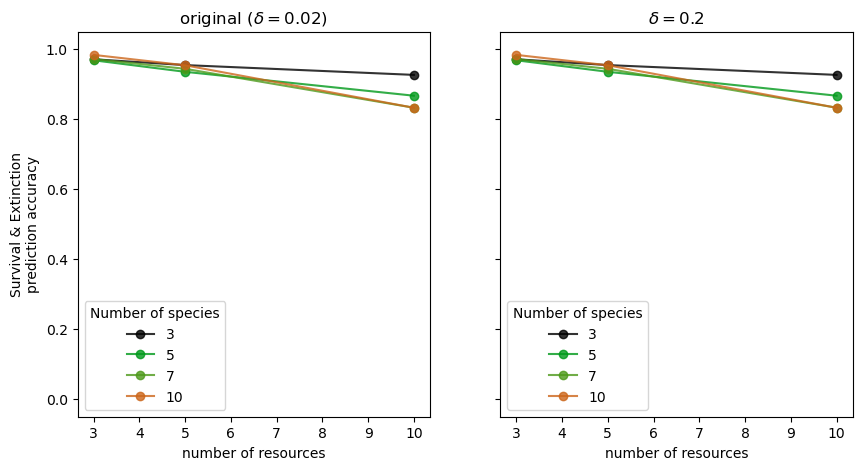

In [106]:
fig, ax = plt.subplots( 1, len(fnames), figsize=(5*len(fnames),5), sharey=True);
data = accu;
ax[0].set_ylabel('Survival & Extinction\nprediction accuracy')
xmax = len(Ss);
for k in np.arange(len(fnames)):
    ax[k].set_xlabel('number of resources');
titles = [r'original ($\delta=0.02$)', '$\delta=0.2$']
for k in np.arange(len(fnames)):
    ax[k].set_title(titles[k])

for k in np.arange(len(fnames)):
    for i in np.arange(xmax):
        ax[k].plot(Rs, data[k,i], color=colors[i], marker='o', alpha=0.8);
        ax[k].legend(Ss, title='Number of species');
ax[k].set_ylim(-0.05,1.05)

### Fig. S10 (cross-feeding)

In [80]:
Ss=[3,5,7,10]; Rs=[3,5,10]; fnames = ['221128_survs_d02_merged','221217_survs_d02_cf','221217_survs_d02_cf2'];
accu = np.zeros((len(fnames),len(Ss),len(Rs)));

for k in np.arange(len(fnames)):
    survs = load_obj(fnames[k]);
    for i in np.arange(len(Ss)):
        for j in np.arange(len(Rs)):
            S = Ss[i]; R = Rs[j]; thres=1e-4;
            surv = survs[(S,R)]; 
            filt = filter_surv(surv, thres); ## filters out extinctions
            surv = surv[filt]; 
            surv = surv*(surv>thres)+thres*0.1;

            pred = arule_h(surv, repeat=True, method=1, thres=thres);
            accu[k,i,j] = 1-np.average( np.sum( ( (pred>thres)!=(surv[:,-1]>thres) ), axis=1))/S;            

(-0.05, 1.05)

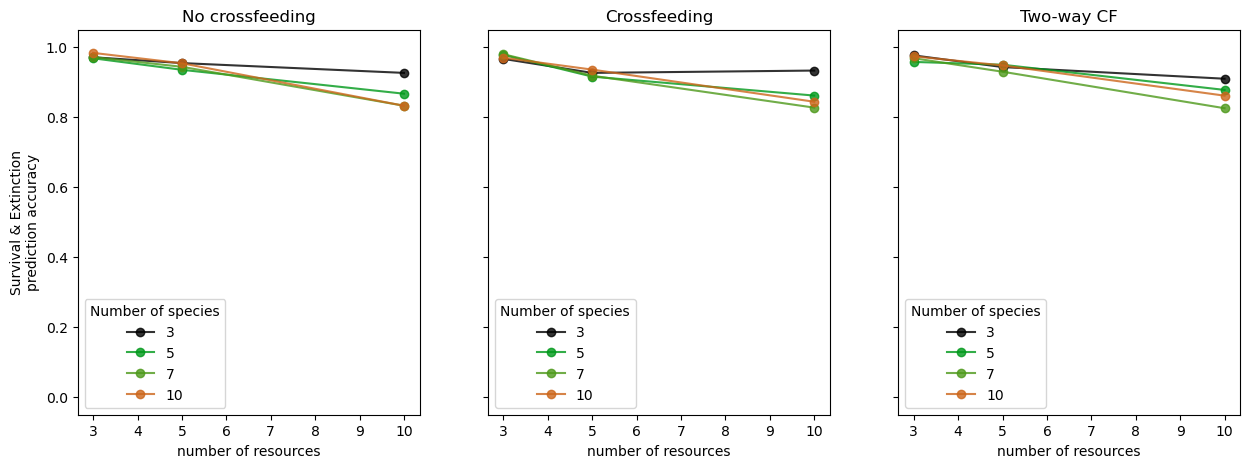

In [81]:
fig, ax = plt.subplots( 1, len(fnames), figsize=(5*len(fnames),5), sharey=True);
data = accu;
ax[0].set_ylabel('Survival & Extinction\nprediction accuracy')
xmax = len(Ss);
for k in np.arange(len(fnames)):
    ax[k].set_xlabel('number of resources');
titles = ['No crossfeeding', 'Crossfeeding','Two-way CF']
for k in np.arange(len(fnames)):
    ax[k].set_title(titles[k])

for k in np.arange(len(fnames)):
    for i in np.arange(xmax):
        ax[k].plot(Rs, data[k,i], color=colors[i], marker='o', alpha=0.8);
        ax[k].legend(Ss, title='Number of species');
ax[k].set_ylim(-0.05,1.05)

## Appendix IV

### Fig. S13

In [82]:
survs = load_obj('221128_survs_d02_merged');
Ss = [3,5,7,10,12];
Rs = [1,3,5,10,20,30,50,100];

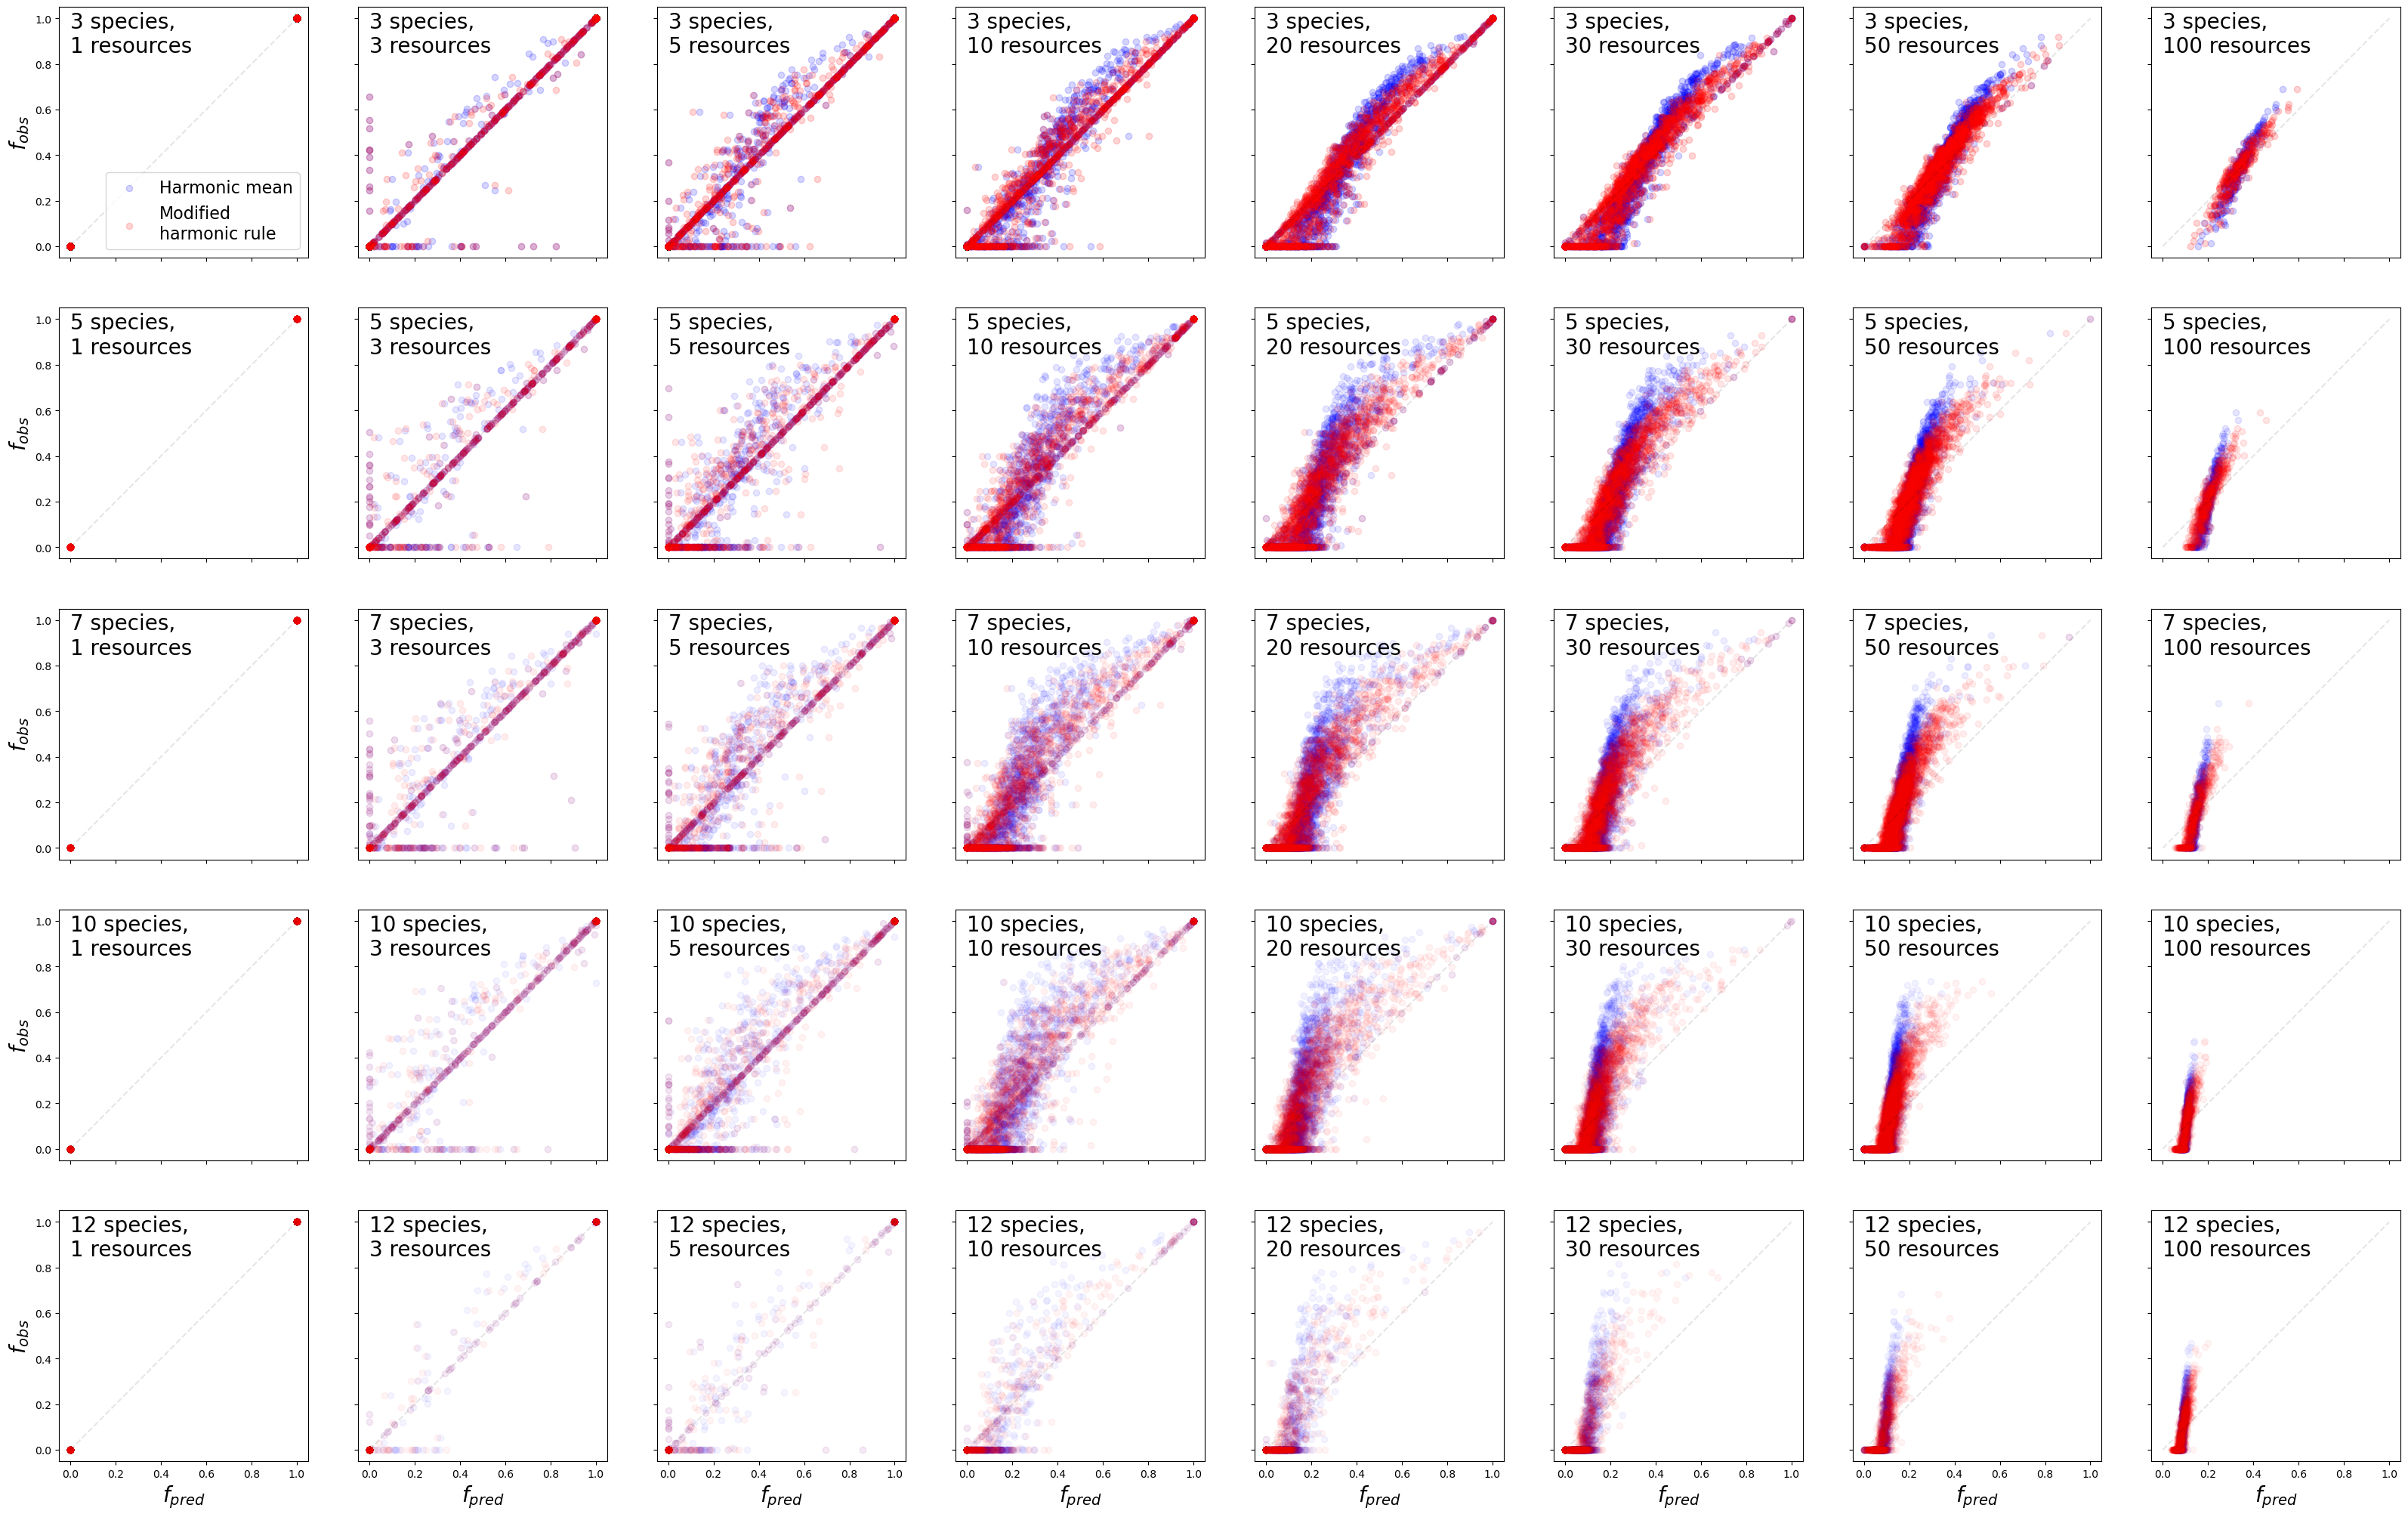

In [83]:
fig, ax = plt.subplots(len(Ss),len(Rs), sharex=True, sharey=True, figsize=(5*len(Rs),5*len(Ss)));
for i in np.arange(len(Ss)):
    ax[i,0].set_ylabel(r'$f_{obs}$', fontsize=20)
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j]; thres=1e-4;
        surv = survs[(S,R)]; 
        filt = filter_surv(surv, thres);
        surv = surv[filt]; 
        pred = arule_h(surv, repeat=True, method=1, thres=thres);
        l1 = ax[i,j].scatter(pred,surv[:,-1], alpha=0.5/S, color='b');
        pred = arule_h(surv, repeat=True, method=0, thres=thres);
        l2 = ax[i,j].scatter(pred,surv[:,-1], alpha=0.5/S, color='r');
        ax[i,j].text(0,0.85,'{} species,\n{} resources'.format(S,R), fontsize=20 );
        ax[i,j].plot(np.linspace(0,1,10),np.linspace(0,1,10),'k--', alpha=0.1, zorder=1);
        if(i==len(Ss)-1):
            ax[i,j].set_xlabel(r'$f_{pred}$', fontsize=20);
        if( i==0 and j==0 ):
            ax[i,j].legend([l1,l2],['Harmonic mean','Modified\nharmonic rule'], loc='lower right', fontsize=16);

### Fig. S14

In [84]:
## Harmonic mean predictions for simulated communities
Ss = [3,5,7,10,12]; Rs = [1, 3, 5, 10,20,30,50,75,100]; 
survs = load_obj('221128_survs_d02_merged');
accu_q = np.zeros((len(Ss),len(Rs)));
accu_q_std = np.zeros((len(Ss),len(Rs)));

for i in np.arange(len(Ss)):
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j]; thres=1e-4;
        surv = survs[(S,R)]; 
        filt = filter_surv(surv, thres); ## filters out extinctions
        surv = surv[filt]; 
        surv = surv*(surv>thres)+thres*1e-3;

        pred = arule_h(surv, repeat=True, method=1, thres=thres);
        accu_q[i,j] = np.mean( np.sum( (pred-surv[:,-1])**2, axis=1)**0.5 ); # L2 norm
        accu_q_std[i,j] = np.std( np.sum( (pred-surv[:,-1])**2, axis=1)**0.5 ); # L2 norm std            

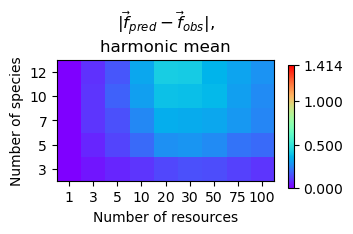

In [85]:
fig, ax = plt.subplots(figsize= (3.5,2));
panel = ax.imshow(accu_q,vmin=0, vmax=2**0.5, cmap=plt.cm.rainbow);
ax.set_xticks(np.arange(len(Rs))); ax.set_xticklabels(Rs);
ax.set_yticks(np.arange(len(Ss))); ax.set_yticklabels(Ss);
ax.set_ylim(-0.5, len(Ss)-0.5);
ax.set_title(r'$|\vec{f}_{pred}-\vec{f}_{obs}|$'+',\nharmonic mean');
ax.set_xlabel('Number of resources');
ax.set_ylabel('Number of species');
fig.colorbar(panel, ax=ax, anchor=(0, 0.3), ticks=[0.0,0.5,1,2**0.5], shrink=0.8);

In [86]:
## Modified harmonic rule predictions for simulated communities
Ss = [3,5,7,10,12]; Rs = [1, 3, 5, 10,20,30,50,75,100]; 
survs = load_obj('221128_survs_d02_merged');
accu_q = np.zeros((len(Ss),len(Rs)));
accu_q_std = np.zeros((len(Ss),len(Rs)));

for i in np.arange(len(Ss)):
    for j in np.arange(len(Rs)):
        S = Ss[i]; R = Rs[j]; thres=1e-4;
        surv = survs[(S,R)]; 
        filt = filter_surv(surv, thres); ## filters out extinctions
        surv = surv[filt]; 
        surv = surv*(surv>thres)+thres*1e-3;

        pred = arule_h(surv, repeat=True, method=0, thres=thres);
        accu_q[i,j] = np.mean( np.sum( (pred-surv[:,-1])**2, axis=1)**0.5 ); # L2 norm
        accu_q_std[i,j] = np.std( np.sum( (pred-surv[:,-1])**2, axis=1)**0.5 ); # L2 norm std            

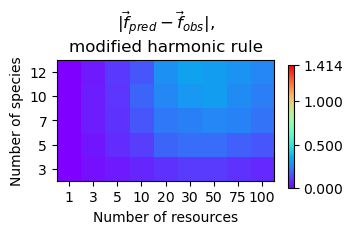

In [87]:
fig, ax = plt.subplots(figsize= (3.5,2));
panel = ax.imshow(accu_q,vmin=0, vmax=2**0.5, cmap=plt.cm.rainbow);
ax.set_xticks(np.arange(len(Rs))); ax.set_xticklabels(Rs);
ax.set_yticks(np.arange(len(Ss))); ax.set_yticklabels(Ss);
ax.set_ylim(-0.5, len(Ss)-0.5);
ax.set_title(r'$|\vec{f}_{pred}-\vec{f}_{obs}|$'+',\nmodified harmonic rule');
ax.set_xlabel('Number of resources');
ax.set_ylabel('Number of species');
fig.colorbar(panel, ax=ax, anchor=(0, 0.3), ticks=[0.0,0.5,1,2**0.5], shrink=0.8);

## Appendix V

In [93]:
survs = load_obj('220815_survs_bistable');
## nb: number of bistable pairs
## types: classify combinations of pairwise outcomes
## ind_viol: cases for which unexpected trio outcomes are observed
## unobss: cases for which not all predicted trio outcome are observed.
nb, types, ind_viol, unobss = arule_b(survs);

[[0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]] 1 0 [[0, 0, 0]] 3.0 1.0
[[0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]] 1 0 [[0, 0, 0]] 3.0 1.0
[[0 1 0]
 [0 1 0]
 [1 0 1]
 [1 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 1 1]
 [1 1 1]] 1 0 [[1, 0, 1], [0, 1, 0]] 4.0 1.0
[[1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]] 2 1 [[0, 0, 1]] 3.0 1.0
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]] 0 1 [[1, 0, 0]] 3.0 1.0
189 5 183 1485


In [94]:
## Cases for which not all predicted trio outcomes are observed

## We manually classified the pairwise outcomes by checking each outcome

#ind_unob = np.where(unobss>0)[0];
#for i in np.arange(len(ind_unob)):
#    print(i)
#    print( 1*(survs[ind_unob]>1e-4)[i] )

## The resulting counts for each combination of pairwise outcome
unobs = [0,0,0,0,9,3,0,0,0];

In [96]:
## Cases for which unexpected trio outcome is observed

## There were 5 cases found in simulation.
## For each case, we checked the time series of population more closely.
## 2 of them were resolved after 10x longer simulations.
## 3 of them were robust, and we counted them.

#nc0s = np.zeros((10,3));
#nc0s[0]=[0.99,0.01,0]; nc0s[1]=[0.01,0.99,0];nc0s[2]=[0.01,0.,0.99];nc0s[3]=[0.99,0.,0.01];nc0s[4]=[0.,0.99,0.01];nc0s[5]=[0,0.01,0.99];nc0s[6]=[0.99,0.005,0.005];nc0s[7]=[0.005,0.99,0.005];nc0s[8]=[0.005,0.005,0.99];nc0s[9]=[0.33,0.33,0.33];
#ind_viol

## The resulting counts for each combination of pairwise outcome
viols = [1,1,0,0,1,0,0,0,0];

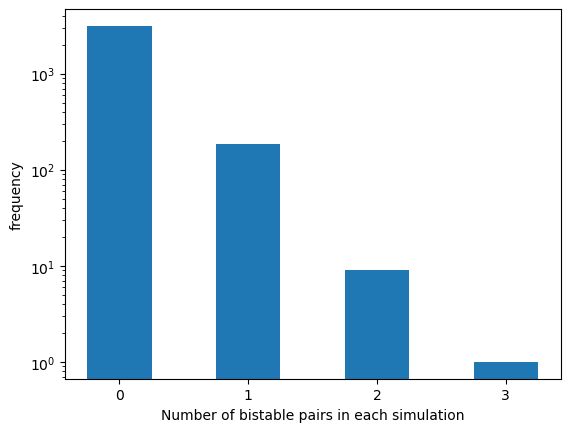

In [95]:
fig, ax = plt.subplots()
ax.set_xticks([0,1,2,3]);
hst = ax.hist( nb, bins=np.linspace(-0.25,3.25,8) )
ax.set_xlabel('Number of bistable pairs in each simulation')
ax.set_ylabel('frequency')
ax.set_yscale('log')

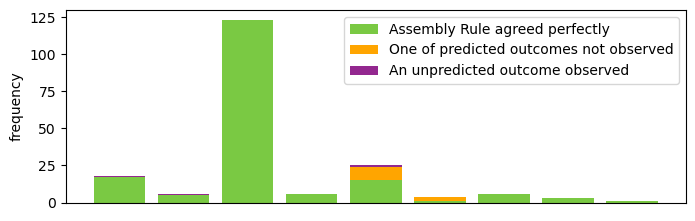

In [50]:
fig, ax = plt.subplots(figsize=(8,2.5));
ax.bar(np.arange(9)+1,np.array(hst)-np.array(viols)-np.array(unobs),color='#7AC943');
ax.bar(np.arange(9)+1,np.array(unobs),bottom=np.array(hst)-np.array(viols)-np.array(unobs),color='orange');
ax.bar(np.arange(9)+1,np.array(viols),bottom=np.array(hst)-np.array(viols),color='#93278F');
ax.set_ylabel('frequency');
ax.set_ylim(0,130);
ax.set_xticks([]);
ax.legend(['Assembly Rule agreed perfectly','One of predicted outcomes not observed','An unpredicted outcome observed']);